In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
nifty_stocks = pd.read_csv("ind_nifty50list.csv")

In [3]:
tickers = nifty_stocks['Symbol'].tolist()

In [4]:
tickers = [s + '.NS' for s in tickers]

In [5]:
data = yf.download(tickers,'2016-1-1')

[*********************100%***********************]  50 of 50 completed


In [6]:
import nsepy
from nsepy import get_history
from datetime import date

#https://nsepy.xyz/

In [7]:
index_data = yf.download('^NSEI','2016-1-1')

[*********************100%***********************]  1 of 1 completed


In [8]:
adj_close_stocks = data['Adj Close']

In [9]:
adj_close_stocks_return = adj_close_stocks.pct_change(1)

In [10]:
adj_close_stocks_return = adj_close_stocks_return.drop(index=adj_close_stocks_return.index[0], axis=0)

In [11]:
adj_close_nifty_return = index_data['Adj Close'].pct_change(1).to_frame()

In [12]:
adj_close_nifty_return = adj_close_nifty_return.drop(index = adj_close_nifty_return.index[0], axis = 0)

In [13]:
adj_close_nifty_return.columns = ['Nifty Returns']

Calculate Betas of the stocks

In [14]:
from scipy import stats

In [15]:
beta_list = []
stock_list = []
for i in adj_close_stocks_return:
    df = pd.merge(adj_close_nifty_return, adj_close_stocks_return[i], how = 'outer', on = ['Date'])
    df = df.dropna()
    lin_reg = stats.linregress(df['Nifty Returns'],df[i])
    beta_list.append(lin_reg[0])
    stock_list.append(i)

In [16]:
betas = pd.DataFrame(list(zip(stock_list, beta_list)), columns =['Stock', 'Beta'])

In [17]:
betas = betas.sort_values(by = 'Beta', ascending = False).reset_index(drop = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9266b7a90>]],
      dtype=object)

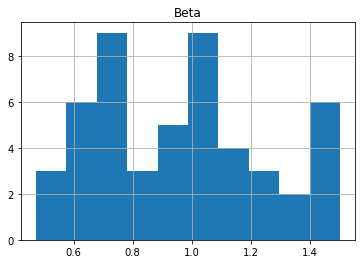

In [20]:
betas.hist()